In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Train data

## Read data and view general info

In [2]:
train_transaction_df = pd.read_csv('data/original_data/train_transaction.csv')
train_transaction_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train_transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [4]:
train_identity_df = pd.read_csv('data/original_data/train_identity.csv')
train_identity_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
train_identity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

### Recreate the full dataset by mergeing with idenity features

In [6]:
train_df = pd.merge(train_transaction_df, train_identity_df, on='TransactionID', how='left')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [7]:
outer_train_df = pd.merge(train_transaction_df, train_identity_df, on='TransactionID', how='outer')
outer_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


In [7]:
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


## View classes distribution

In [8]:
train_df['isFraud'][:5]

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

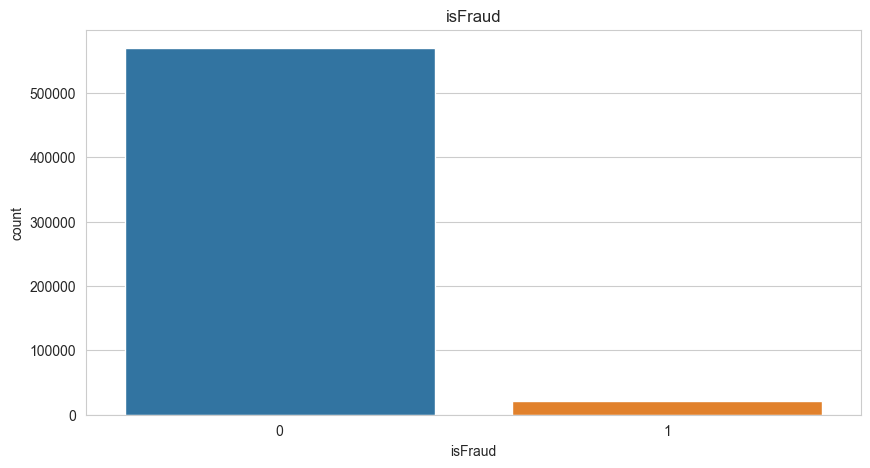

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=train_df, x='isFraud')
 
plt.title('isFraud')
plt.savefig('graphs/train_countplot.png')
plt.show()

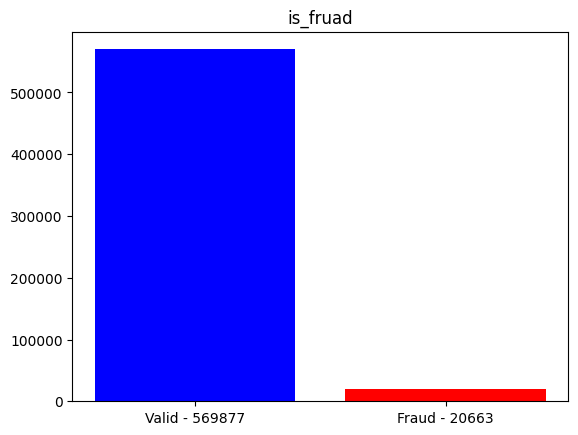

In [11]:
plt.rcdefaults()
# obtain ground truth from train column
is_fraud = train_df['isFraud'].values

# get counts of fruad and not fruad
__num_valid = np.sum(is_fraud == 0)
__num_fraud = is_fraud.size - __num_valid

plt.bar([0, 1], [__num_valid, __num_fraud], color=['blue', 'red'], tick_label=[f"Valid - {__num_valid}", f"Fraud - {__num_fraud}"])
plt.title('is_fruad')
plt.savefig('graphs/train_barplot.png')
plt.show()

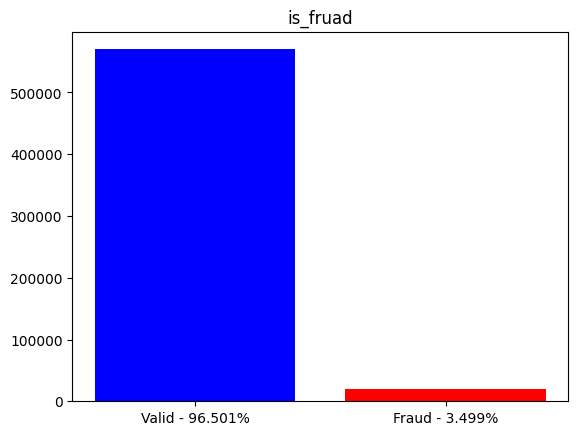

In [13]:
plt.rcdefaults()
# obtain ground truth from train column
is_fraud = train_df['isFraud'].values

# get counts of fruad and not fruad
__num_valid = np.sum(is_fraud == 0)
__num_fraud = is_fraud.size - __num_valid

plt.bar([0, 1], [__num_valid, __num_fraud], color=['blue', 'red'], tick_label=[f"Valid - {__num_valid/is_fraud.size * 100:.3f}%", 
                                                                               f"Fraud - {__num_fraud/is_fraud.size * 100:.3f}%"])
plt.title('is_fruad')
plt.savefig('graphs/train_barplot_percents.png')
plt.show()

## Data Cleaning

In [19]:
# Calculate the percentage of missing values for each column
missing_count = train_df.isnull().sum()

# Create a DataFrame with column names and their respective missing percentages
missing_info = pd.DataFrame({'column_name': train_df.columns, 'missing_count': missing_count})
missing_info.reset_index(drop=True, inplace=True)

missing_info.head()

,column_name,missing_count
0,TransactionID,0
1,isFraud,0
2,TransactionDT,0
3,TransactionAmt,0
4,ProductCD,0


In [30]:
missing_info = missing_info.sort_values(by='missing_count', ascending=False)
missing_info.reset_index(drop=True, inplace=True)
missing_info.head()

,column_name,missing_count
0,id_24,585793
1,id_25,585408
2,id_07,585385
3,id_08,585385
4,id_21,585381


In [31]:
missing_info.transpose()

,0,1,2,3,4,5,6,7,8,9,...,424,425,426,427,428,429,430,431,432,433
column_name,id_24,id_25,id_07,id_08,id_21,id_26,id_22,id_23,id_27,dist2,...,C14,C5,C13,C12,C11,C4,C8,C6,C10,TransactionID
missing_count,585793,585408,585385,585385,585381,585377,585371,585371,585371,552913,...,0,0,0,0,0,0,0,0,0,0


In [39]:
missing_info[315:325]

,column_name,missing_count
315,V17,76073
316,V31,76073
317,V15,76073
318,V20,76073
319,D10,76022
320,addr1,65706
321,addr2,65706
322,card2,8933
323,card5,4259
324,card4,1577


### Removal of Features with too many missing Values

In [40]:
MISSING_TOLERANCE = 9000 # if missing count over 9000 throw out the feature

num_missing_by_feature = train_df.isnull().sum()
features_to_remove = []

for feature, num_missing in num_missing_by_feature.items():
    if num_missing <= MISSING_TOLERANCE: continue
    features_to_remove.append(feature)

print(f"len(features_to_remove) = {len(features_to_remove)}")

len(features_to_remove) = 322


In [41]:
# drop features that cannot be recovered
train_df_features_removed = train_df.drop(columns=features_to_remove)

# show new shape
print(f'Training dataset form where features missing more than {MISSING_TOLERANCE} records have been removed: {train_df_features_removed.shape}')
train_df_features_removed.head()

Training dataset form where features missing more than 9000 records have been removed: (590540, 112)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
print(f"len(train_df) = {len(train_df)}")
print(f"len(train_df_features_removed) = {len(train_df_features_removed)}")

len(train_df) = 590540
len(train_df_features_removed) = 590540


In [44]:
# Calculate the percentage of missing values for each column
missing_count = train_df_features_removed.isnull().sum()

# Create a DataFrame with column names and their respective missing percentages
missing_info = pd.DataFrame({'column_name': train_df_features_removed.columns, 'missing_count': missing_count})
missing_info.reset_index(drop=True, inplace=True)
missing_info = missing_info.sort_values(by='missing_count', ascending=False)
missing_info.reset_index(drop=True, inplace=True)

missing_info.transpose()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
column_name,card2,card5,card4,card6,card3,V281,V315,D1,V301,V300,...,C6,C7,C8,C9,C11,C12,C13,C14,isFraud,TransactionID
missing_count,8933,4259,1577,1571,1565,1269,1269,1269,1269,1269,...,0,0,0,0,0,0,0,0,0,0


### Save dataframe with removed_columns to a separate file 

In [46]:
train_df_features_removed.to_csv('data/removed_columns_data/train.csv', index=False)

#### Check the correctness of data saving

In [47]:
train_df_features_removed_test = pd.read_csv('data/removed_columns_data/train.csv')
train_df_features_removed_test.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Compare the two DataFrames, including NaN values
train_df_features_removed.equals(train_df_features_removed_test)

False

In [53]:
# Compare the two DataFrames, excluding NaN values
comparison = train_df_features_removed.compare(train_df_features_removed_test)

# Display the differences
print(comparison)

       V126        V127       V128       V129        V130        ... V317  \
       self other  self other self other self other  self other  ... self   
926     NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN  ...  NaN   
932     NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN  ...  NaN   
1834    NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN  ...  NaN   
2141    NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN  ...  NaN   
2176    NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN  ...  NaN   
...     ...   ...   ...   ...  ...   ...  ...   ...   ...   ...  ...  ...   
574529  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN  ...  NaN   
578521  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN  ...  NaN   
580102  NaN   NaN   NaN   NaN  NaN   NaN  NaN   NaN   NaN   NaN  ...  NaN   
584573  NaN   NaN  31.9  31.9  NaN   NaN  NaN   NaN  31.9  31.9  ...  NaN   
588284  NaN   NaN  31.9  31.9  NaN   NaN  NaN   NaN  31.9  31.9  ...  NaN   

In [54]:
# Calculate the percentage of missing values for each column
missing_count = train_df_features_removed_test.isnull().sum()

# Create a DataFrame with column names and their respective missing percentages
missing_info_test = pd.DataFrame({'column_name': train_df_features_removed_test.columns, 'missing_count': missing_count})
missing_info_test.reset_index(drop=True, inplace=True)
missing_info_test = missing_info_test.sort_values(by='missing_count', ascending=False)
missing_info_test.reset_index(drop=True, inplace=True)

missing_info_test.transpose()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
column_name,card2,card5,card4,card6,card3,V281,V315,D1,V301,V300,...,C6,C7,C8,C9,C11,C12,C13,C14,isFraud,TransactionID
missing_count,8933,4259,1577,1571,1565,1269,1269,1269,1269,1269,...,0,0,0,0,0,0,0,0,0,0


In [55]:
missing_info.transpose()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
column_name,card2,card5,card4,card6,card3,V281,V315,D1,V301,V300,...,C6,C7,C8,C9,C11,C12,C13,C14,isFraud,TransactionID
missing_count,8933,4259,1577,1571,1565,1269,1269,1269,1269,1269,...,0,0,0,0,0,0,0,0,0,0


In [56]:
missing_info.equals(missing_info_test)

True

In [57]:
print(f"len(train_df_features_removed) = {len(train_df_features_removed)}")
print(f"len(train_df_features_removed_test) = {len(train_df_features_removed_test)}")

len(train_df_features_removed) = 590540
len(train_df_features_removed_test) = 590540


### Remove records that do not reflect fraud (isFraud = False) for columns with a NaN value

In [53]:
# Calculate the percentage of missing values for each column
missing_percentage = (train_df_features_removed.isnull().sum() / len(train_df_features_removed)) * 100

# Create a DataFrame with column names and their respective missing percentages
missing_info = pd.DataFrame({'column_name': train_df_features_removed.columns, 'missing_percentage': missing_percentage})
missing_info.transpose()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
column_name,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
missing_percentage,0.0,0.0,0.0,0.0,0.0,0.0,1.512683,0.265012,0.267044,0.721204,...,0.002032,0.214888,0.214888,0.214888,0.002032,0.002032,0.002032,0.002032,0.002032,0.002032


In [57]:
columns_with_NaN_values = missing_info[missing_info['missing_percentage'] > 0]['column_name'].values
len(columns_with_NaN_values)

162

In [59]:
for column in columns_with_NaN_values:
    # Create a boolean mask to identify rows where the specified column is not NaN and 'y' is not 'Fraud'
    mask = train_df_features_removed.apply(lambda row: not pd.isna(row[column_name]) or row['y'] == 'Fraud', axis=1)

    # Filter the DataFrame based on the mask
    train_df_features_removed = train_df_features_removed[mask]

print(f"len(train_df) = {len(train_df)}")
print(f"len(train_df_features_removed) = {len(train_df_features_removed)}")

KeyError: 'ColumnName'